In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

Preprocessing of train data

In [3]:
train_df = pd.read_csv('train_loan.csv')

In [4]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train_df.isna().sum()/len(train_df) *100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Outlier handling in ApplicantIncome

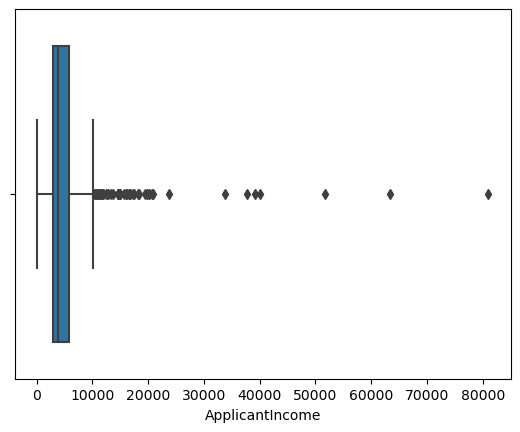

In [9]:
sns.boxplot(x=train_df['ApplicantIncome'])
plt.show()

In [10]:
q1 = train_df['ApplicantIncome'].quantile(0.25)
q3 = train_df['ApplicantIncome'].quantile(0.75)

iqr = q3 - q1
print(iqr)

2917.5


In [11]:
lower_limit = q1 - 1.5 *iqr
upper_limit = q3 + 1.5 * iqr

In [12]:
print(upper_limit)
print(lower_limit)

10171.25
-1498.75


In [13]:
def limit_imputer(value):
    
    if value > upper_limit:
        return upper_limit
    elif value < lower_limit:
        return lower_limit
    else:
        return value

In [14]:
train_df['ApplicantIncome'] = train_df['ApplicantIncome'].apply(limit_imputer)

Outlier handling in LoanAmount

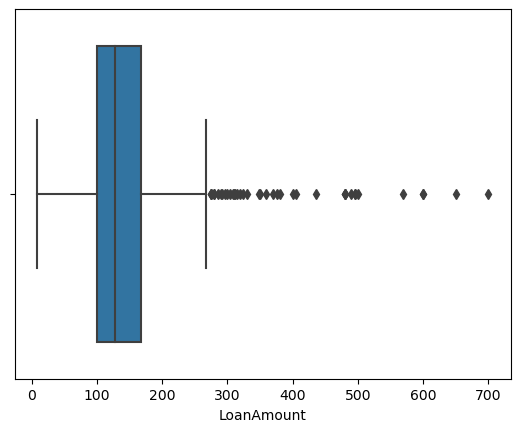

In [15]:
sns.boxplot(x=train_df['LoanAmount'])
plt.show()

In [16]:
q1 = train_df['LoanAmount'].quantile(0.25)
q3 = train_df['LoanAmount'].quantile(0.75)

iqr = q3 - q1
print(iqr)

68.0


In [17]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 *iqr

In [18]:
print(upper_limit)
print(lower_limit)

270.0
-2.0


In [19]:
train_df['LoanAmount'] = train_df['LoanAmount'].apply(limit_imputer)

Outlier handling in CoapplicantIncome

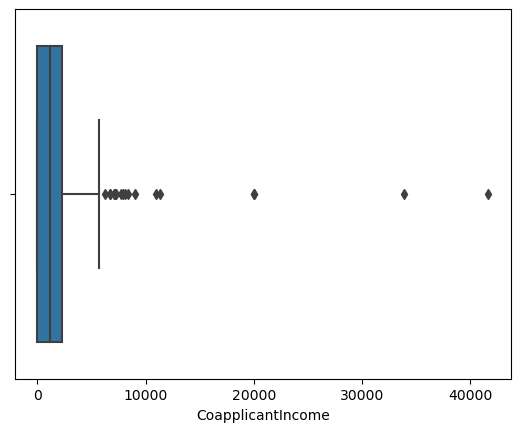

In [20]:
sns.boxplot(x=train_df['CoapplicantIncome'])
plt.show()

In [21]:
q1 = train_df['CoapplicantIncome'].quantile(0.25)
q3 = train_df['CoapplicantIncome'].quantile(0.75)

iqr = q3 - q1
print(iqr)

2297.25


In [22]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 *iqr

In [23]:
print(upper_limit)
print(lower_limit)

5743.125
-3445.875


In [24]:
train_df['CoapplicantIncome'] = train_df['CoapplicantIncome'].apply(limit_imputer)

In [25]:
train_df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

#Handling missing values

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
columns_1 = ['Gender', 'Married', 'Self_Employed', 'Dependents', 'Credit_History']
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train_df[columns_1]=imputer.fit_transform(train_df[columns_1])

In [29]:
train_df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
train_df['Dependents'] = train_df['Dependents'].str.strip('+')

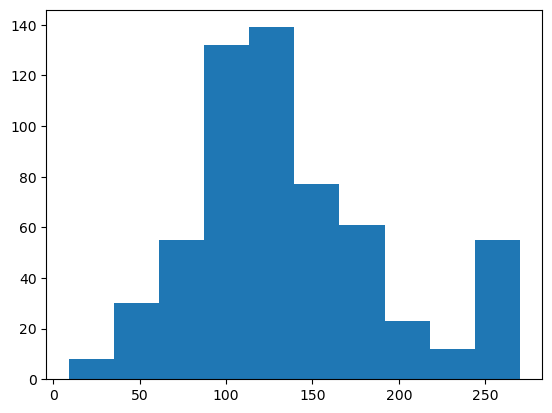

In [31]:
plt.hist(train_df['LoanAmount'])
plt.show()


In [32]:
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())

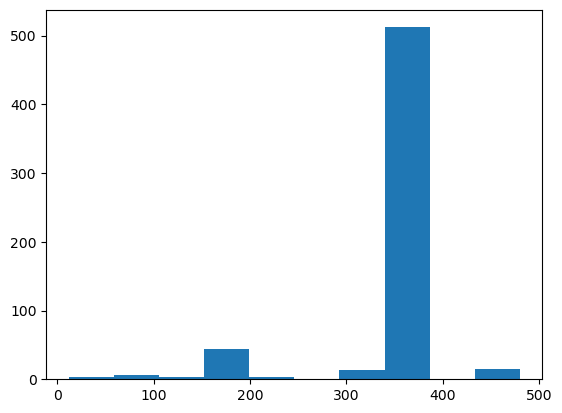

In [33]:
plt.hist(train_df['Loan_Amount_Term'])
plt.show()

In [34]:
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median())

In [35]:
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Encoding the data

In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_2 = ['Gender', 'Married', 'Self_Employed', 'Dependents', 'Credit_History', 'Education', 'Property_Area', 'Loan_Status']
for column in columns_2:
    train_df[column] = label_encoder.fit_transform(train_df[column])

In [37]:
train_df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status            int64
dtype: object

In [38]:
train_df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.00,0.000,138.288851,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583.00,1508.000,128.000000,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000.00,0.000,66.000000,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583.00,2358.000,120.000000,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000.00,0.000,141.000000,360.0,1,2,1
5,LP001011,1,1,2,0,1,5417.00,4196.000,267.000000,360.0,1,2,1
6,LP001013,1,1,0,1,0,2333.00,1516.000,95.000000,360.0,1,2,1
7,LP001014,1,1,3,0,0,3036.00,2504.000,158.000000,360.0,0,1,0
8,LP001018,1,1,2,0,0,4006.00,1526.000,168.000000,360.0,1,2,1
9,LP001020,1,1,1,0,0,10171.25,5743.125,270.000000,360.0,1,1,0


In [39]:
train_df.drop('Loan_ID', axis=1, inplace=True)

Scaling the data

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns3 = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
train_df[columns3] = scaler.fit_transform(train_df[columns3])

In [41]:
train_df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.568692,0.000000,0.495360,0.743590,1,2,1
1,1,1,1,0,0,0.442360,0.262575,0.455939,0.743590,1,0,0
2,1,1,0,0,1,0.284396,0.000000,0.218391,0.743590,1,2,1
3,1,1,0,1,0,0.242784,0.410578,0.425287,0.743590,1,2,1
4,1,0,0,0,0,0.583760,0.000000,0.505747,0.743590,1,2,1
5,1,1,2,0,1,0.525583,0.730613,0.988506,0.743590,1,2,1
6,1,1,0,1,0,0.217837,0.263968,0.329502,0.743590,1,2,1
7,1,1,3,0,0,0.287988,0.436000,0.570881,0.743590,0,1,0
8,1,1,2,0,0,0.384782,0.265709,0.609195,0.743590,1,2,1
9,1,1,1,0,0,1.000000,1.000000,1.000000,0.743590,1,1,0


Preprocessing of test data

In [42]:
test_df = pd.read_csv('test_loan.csv')

In [43]:
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [44]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [45]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [46]:
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Outlier handling in ApplicantIncome

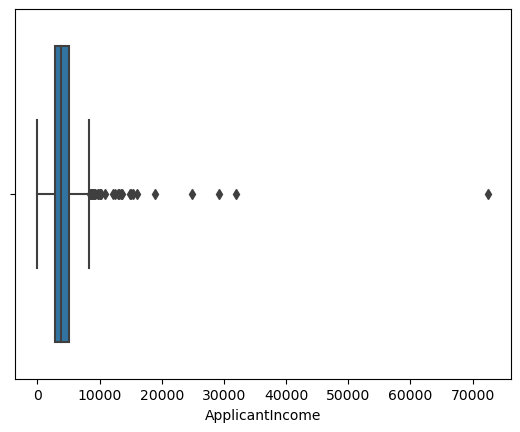

In [47]:
sns.boxplot(x=test_df['ApplicantIncome'])
plt.show()

In [48]:
q1 = test_df['ApplicantIncome'].quantile(0.25)
q3 = test_df['ApplicantIncome'].quantile(0.75)

iqr = q3 - q1
print(iqr)

2196.0


In [49]:
lower_limit = q1 - 1.5 *iqr
upper_limit = q3 + 1.5 * iqr

In [50]:
print(upper_limit)
print(lower_limit)

8354.0
-430.0


In [51]:
test_df['ApplicantIncome'] = test_df['ApplicantIncome'].apply(limit_imputer)

Outlier handling in LoanAmount

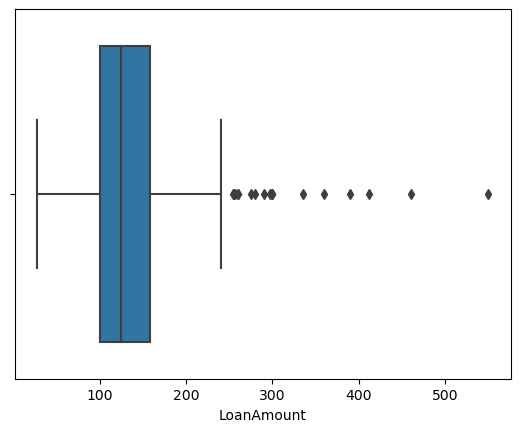

In [52]:
sns.boxplot(x=test_df['LoanAmount'])
plt.show()

In [53]:
q1 = test_df['LoanAmount'].quantile(0.25)
q3 = test_df['LoanAmount'].quantile(0.75)

iqr = q3 - q1
print(iqr)

57.75


In [54]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 *iqr

In [55]:
print(upper_limit)
print(lower_limit)

244.625
13.625


In [56]:
test_df['LoanAmount'] = test_df['LoanAmount'].apply(limit_imputer)

Outlier handling in CoapplicantIncome

In [57]:
q1 = test_df['CoapplicantIncome'].quantile(0.25)
q3 = test_df['CoapplicantIncome'].quantile(0.75)

iqr = q3 - q1
print(iqr)

2430.5


In [58]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 *iqr

In [59]:
print(upper_limit)
print(lower_limit)

6076.25
-3645.75


In [60]:
test_df['CoapplicantIncome'] = test_df['CoapplicantIncome'].apply(limit_imputer)

#Handling missing values

In [61]:
from sklearn.impute import SimpleImputer

In [62]:
columns_1 = ['Gender', 'Self_Employed', 'Dependents', 'Credit_History']
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
test_df[columns_1]=imputer.fit_transform(test_df[columns_1])

In [63]:
test_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

In [64]:
test_df['Dependents'] = test_df['Dependents'].str.strip('+')

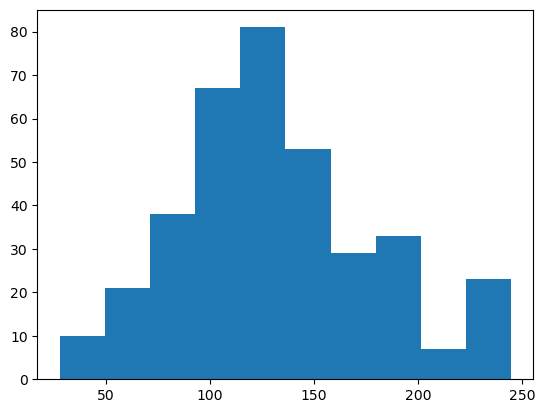

In [65]:
plt.hist(test_df['LoanAmount'])
plt.show()

In [66]:
test_df['LoanAmount'] = test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean())

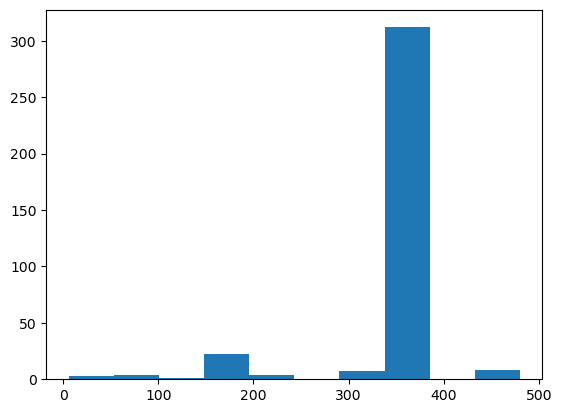

In [67]:
plt.hist(test_df['Loan_Amount_Term'])
plt.show()

In [68]:
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].median())

In [69]:
test_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Encoding the data

In [70]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_2 = ['Gender', 'Married', 'Self_Employed', 'Dependents', 'Credit_History', 'Education', 'Property_Area']
for column in columns_2:
    test_df[column] = label_encoder.fit_transform(test_df[column])

In [71]:
test_df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
dtype: object

In [72]:
test_df.drop('Loan_ID', axis=1, inplace=True)

Scaling the data

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns3 = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
test_df[columns3] = scaler.fit_transform(test_df[columns3])

In [74]:
test_df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,0.684702,0.000000,0.378534,0.746835,1,2
1,1,1,1,0,0,0.368207,0.246863,0.452395,0.746835,1,2
2,1,1,2,0,0,0.598516,0.296235,0.830929,0.746835,1,2
3,1,1,2,0,0,0.280105,0.419008,0.332372,0.746835,1,2
4,1,0,0,1,0,0.392147,0.000000,0.230814,0.746835,1,2
5,1,1,0,1,1,0.259157,0.563176,0.572418,0.746835,1,2
6,0,0,1,1,0,0.266459,0.000000,0.143104,0.746835,1,1
7,1,1,2,1,0,0.464568,0.000000,0.549336,0.746835,0,0
8,1,1,2,0,0,1.000000,0.000000,1.000000,0.493671,1,2
9,1,0,0,1,0,0.287288,0.394980,0.438546,0.746835,1,1
